In [404]:
#Importing pandas & OS
import pandas as pd
import os
import geopandas as gpd
import shapefile
import pandas_bokeh
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
%matplotlib inline

In [405]:
file_path = os.path.join("conposcovidloc.csv")
covid_df = pd.read_csv(file_path)
covid_df['Case_Reported_Date'] = pd.to_datetime(covid_df['Case_Reported_Date'])
covid_df.head(100)

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-10-31,2020-11-01,2020-11-01,2020-11-01,20s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
1,2,2020-10-17,2020-10-30,2020-10-30,2020-10-30,40s,MALE,OB,Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
2,3,2020-10-30,2020-11-02,2020-11-02,2020-10-31,50s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
3,4,2020-10-30,2020-11-01,2020-11-01,2020-11-01,20s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
4,5,2020-10-30,2020-11-01,2020-11-01,2020-10-31,40s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2020-10-13,2020-10-15,2020-10-15,2020-10-14,40s,MALE,CC,Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
96,97,2020-10-20,2020-10-25,2020-10-25,2020-10-24,20s,FEMALE,No known epi link,Resolved,NaN,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341
97,98,2020-09-14,2020-09-19,2020-09-19,2020-09-18,70s,FEMALE,CC,Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
98,99,2020-10-07,2020-10-14,2020-10-14,2020-10-11,40s,MALE,CC,Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893


In [406]:
#Creating a column & extracting the month
covid_df['month'] = pd.DatetimeIndex(covid_df['Case_Reported_Date']).month
covid_df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude,month
0,1,2020-10-31,2020-11-01,2020-11-01,2020-11-01,20s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156,11
1,2,2020-10-17,2020-10-30,2020-10-30,2020-10-30,40s,MALE,OB,Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156,10
2,3,2020-10-30,2020-11-02,2020-11-02,2020-10-31,50s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156,11
3,4,2020-10-30,2020-11-01,2020-11-01,2020-11-01,20s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156,11
4,5,2020-10-30,2020-11-01,2020-11-01,2020-10-31,40s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156,11


In [407]:
#Creating final dataframe with relevant info

COVID_ON_GroupBy_Month = covid_df.groupby(["Reporting_PHU_Postal_Code"])
Reported_cases_per_month_ON = pd.DataFrame({"Postal_Code": COVID_ON_GroupBy_Month["Reporting_PHU_Postal_Code"].first(),
                                            "Number of Cases": COVID_ON_GroupBy_Month["Reporting_PHU_Postal_Code"].count(),
                                            "Latitude": COVID_ON_GroupBy_Month["Reporting_PHU_Latitude"].first(),
                                            "Longitude": COVID_ON_GroupBy_Month["Reporting_PHU_Longitude"].first()})
                                            
Reported_cases_per_month_ON = Reported_cases_per_month_ON.reset_index(drop=True)

Reported_cases_per_month_ON


,Postal_Code,Number of Cases,Latitude,Longitude
0,K2G 6J8,7223,45.345665,-75.763912
1,K6J 5T1,635,45.029152,-74.736298
2,K6V 7A3,453,44.615843,-75.702833
3,K7M 1V5,180,44.227874,-76.525211
4,K8A 6W5,110,45.799406,-77.118727
5,K8P 4P1,79,44.186674,-77.391446
6,K9J 2R8,150,44.301632,-78.321347
7,L1A 3V6,256,43.968173,-78.285792
8,L1N 0B2,3108,43.898605,-78.940341
9,L2V 4T7,1511,43.116537,-79.241220


In [408]:
gdf = geopandas.GeoDataFrame(Reported_cases_per_month_ON, geometry=geopandas.points_from_xy(Reported_cases_per_month_ON.Longitude, Reported_cases_per_month_ON.Latitude))

In [409]:
canada = gpd.GeoDataFrame.from_file("lpr_000a16a_e\lpr_000a16a_e.shp")
ontario = canada[canada['PRUID'] == '35']
ontario['geometry'] = ontario['geometry'].to_crs(epsg=4326)
ontario


C:\Users\eluba\anaconda3\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"POLYGON ((-88.86612 56.84777, -88.86838 56.834..."


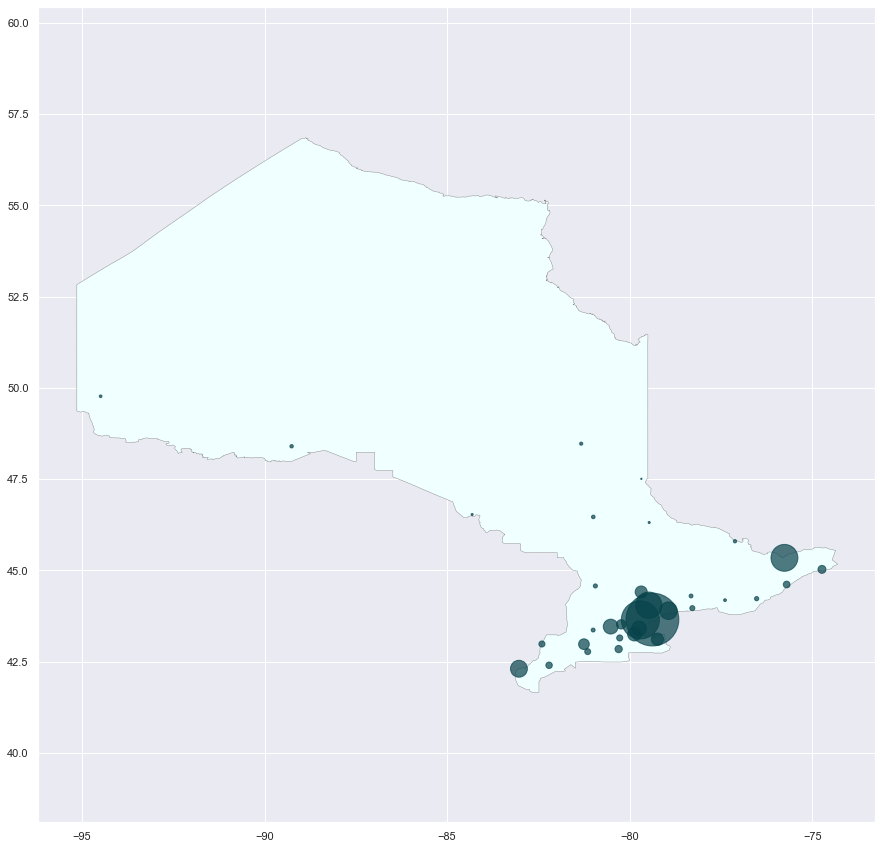

<Figure size 432x288 with 0 Axes>

In [411]:
color = 'greens'
fig, ax = plt.subplots(figsize=(15,15))
gdf["Number of Cases"] = gdf["Number of Cases"]/10
ontario.plot(ax=ax, color="azure", edgecolor="grey", linewidth=0.4)
gdf.plot(ax=ax,color="#07424A", markersize="Number of Cases",alpha=0.7, categorical=False, legend=True )

plt.axis('equal')

plt.show()
plt.savefig("Covid_Cases_bubbles.png")